In [89]:
import pickle

from almc.bayesian_rescal import PFBayesianRescal
import numpy as np
from scipy.io import loadmat
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

In [90]:
def load_dataset(dataset):

    if dataset == 'umls':
        mat = loadmat('../data/%s/uml.mat' % (dataset))
        T = np.array(mat['Rs'], np.float32)
    elif dataset == 'nation':
        mat = loadmat('../data/%s/dnations.mat' % (dataset))
        T = np.array(mat['R'], np.float32)
    elif dataset == 'kinship':
        mat = loadmat('../data/%s/alyawarradata.mat' % (dataset))
        T = np.array(mat['Rs'], np.float32)
    elif dataset == 'wordnet':
        T = pickle.load(open('../data/%s/reduced_wordnet.pkl' % (dataset), 'rb'))

    if dataset != 'wordnet':
        T = np.swapaxes(T, 1, 2)
        T = np.swapaxes(T, 0, 1)  # [relation, entity, entity]
        T[np.isnan(T)] = 0
    return T

In [103]:
dataset = 'umls'
T = load_dataset(dataset)
n_relation, n_entity, _ = T.shape

In [104]:
n_relation

49

In [105]:
n_entity

135

## Number of triples per relation

<Container object of 49 artists>

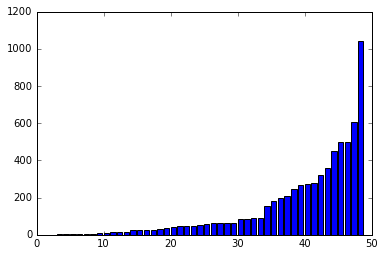

In [106]:
plt.bar(range(n_relation), sorted(np.sum(np.sum(T,1),1)))

## Outgoing degree distribution

<Container object of 135 artists>

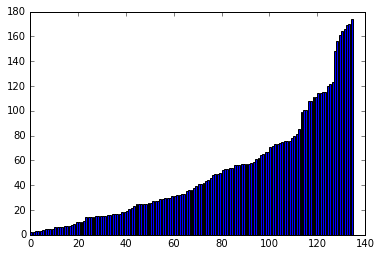

In [107]:
plt.bar(range(n_entity), sorted(np.sum(np.sum(T,0),1)))

## Incoming degree distribution

<Container object of 135 artists>

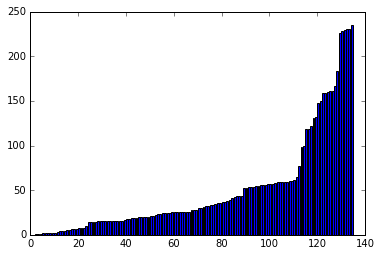

In [108]:
plt.bar(range(n_entity), sorted(np.sum(np.sum(T,0),0)))

In [1]:
import pickle

In [2]:
T = pickle.load(open('../data/wordnet/wordnet_csr.pkl','rb'))

In [7]:
n_relation = len(T)
n_entity = T[0].shape[0]

<Container object of 11 artists>

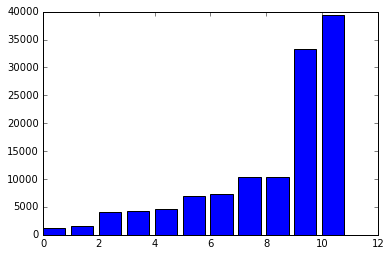

In [8]:
plt.bar(range(n_relation), sorted([R.nnz for R in T]))

In [9]:
sumT = T[0].copy()
for k in range(1, n_relation):
    sumT += T[k]

<Container object of 38696 artists>

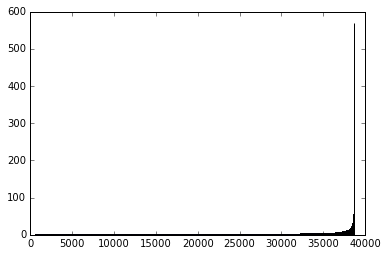

In [14]:
plt.bar(range(n_entity), sorted(sumT.sum(1)))

<Container object of 38696 artists>

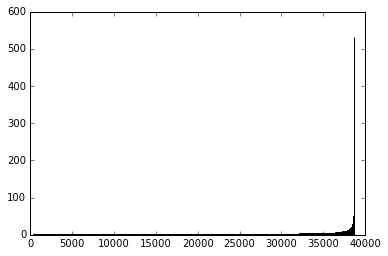

In [37]:
A = np.squeeze(np.asarray(sumT.sum(0)))
plt.bar(range(n_entity), sorted(A))

In [85]:
n_entity = 100
e = np.random.normal(loc = np.random.normal(size=n_entity), size=n_entity)
r = np.random.normal(loc = np.random.normal(size=n_entity), size=n_entity)

In [86]:
x = np.zeros([len(r), n_entity, n_entity])

import itertools
for i, j, k in itertools.product(range(n_entity), range(n_entity), range(len(r))):
    x[k,i,j]= e[i]*e[j]*r[k]
    
x = 1./(1.+np.exp(-x))

In [87]:
x = np.random.binomial(1, x)

<Container object of 100 artists>

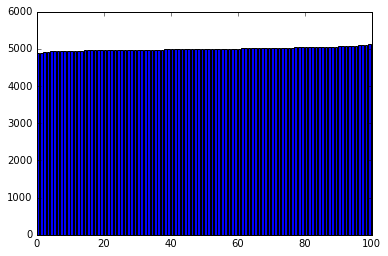

In [88]:
plt.bar(range(n_entity), sorted(np.sum(np.sum(x,0),1)))